In [82]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import scipy 
import sys
import os 
import pickle 
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras

In [83]:
df = pd.read_csv('features.csv')
df.head()

,filename,audio_data_mean,audio_data_var,zcr_mean,zcr_var,sc_mean,sc_var,srolloff_mean,srolloff_var,mfcc_mean,mfcc_var,chroma_mean,chroma_var,scale
0,anchihoye000.wav,-0.000006,0.005767,0.048047,0.045739,1236.041685,397272.486928,2527.453472,2.556835e+06,-3.793658,4782.8110,0.268505,0.093303,AnchiHoye
1,anchihoye001.wav,0.000002,0.007420,0.046920,0.044718,1246.844132,217029.787152,2512.568981,2.030557e+06,-3.163025,3988.4268,0.272218,0.095269,AnchiHoye
2,anchihoye003.wav,0.000004,0.005981,0.045324,0.043269,1279.097243,327517.334024,2737.849051,3.193764e+06,-3.935383,4849.9614,0.293874,0.098514,AnchiHoye
3,anchihoye004.wav,0.000007,0.007290,0.044092,0.042148,1270.930208,266605.091411,2655.043945,2.447221e+06,-3.579515,4236.3540,0.281644,0.097337,AnchiHoye
4,anchihoye005.wav,-0.000014,0.008152,0.047311,0.045073,1273.617030,244748.246538,2640.627874,2.295764e+06,-3.981096,4098.4520,0.267864,0.094419,AnchiHoye


In [84]:
df.shape

(426, 14)

In [85]:
df.dtypes

filename            object
audio_data_mean    float64
audio_data_var     float64
zcr_mean           float64
zcr_var            float64
sc_mean            float64
sc_var             float64
srolloff_mean      float64
srolloff_var       float64
mfcc_mean          float64
mfcc_var           float64
chroma_mean        float64
chroma_var         float64
scale               object
dtype: object

In [86]:
df = df.drop(labels='filename',axis = 1)

In [87]:
'''Diplaying the Audio waveform - A random Wav file of "Bati001.wav"'''
import IPython
data,sampling_rate = librosa.load(os.getcwd() + '/Bati/bati001.wav')
IPython.display.Audio(data,rate=sampling_rate)

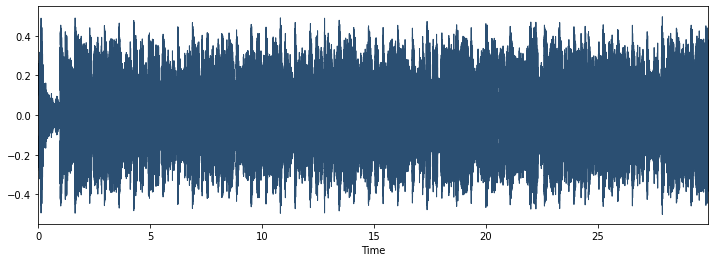

In [88]:
plt.figure(figsize = (12,4))
librosa.display.waveplot(data,color = "#2B4F72")
plt.show()

ZCR: 100


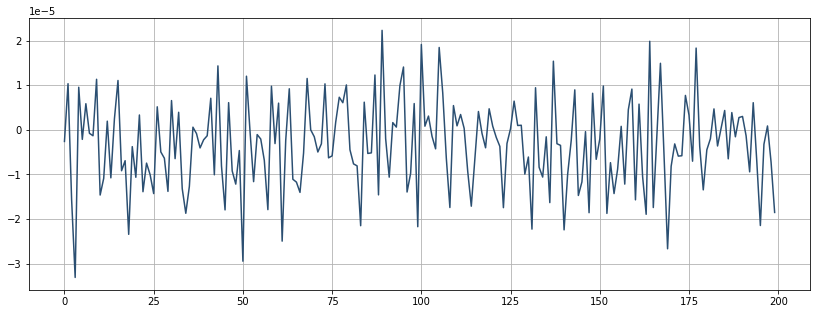

In [55]:
'''Plotting the Zero Cross Rate from 3000 - 3200'''
start = 3000
end = 3200
plt.figure(figsize = (14,5))
plt.plot(data[start:end],color = '#2B4F72')
plt.grid()
zero_cross_rate = librosa.zero_crossings(data[start:end],pad=False)
print ("ZCR:",sum(zero_cross_rate))

c:\python39\lib\site-packages\librosa\display.py:954: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn(


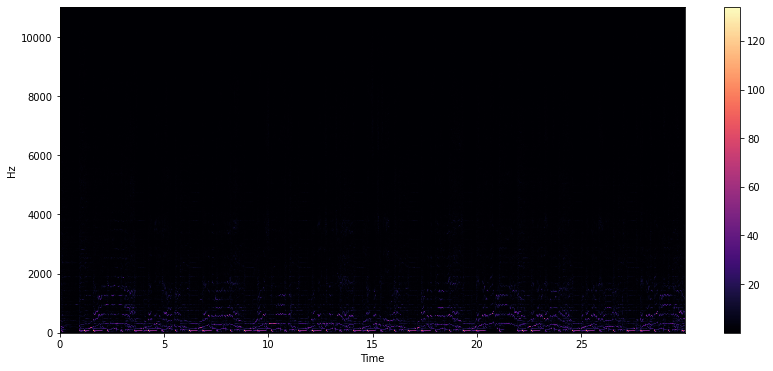

In [63]:
'''Plotting the Short Fourier Transform'''

stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize = (14,6))
librosa.display.specshow(stft,sr = sampling_rate,x_axis = 'time',y_axis='hz')
plt.colorbar()

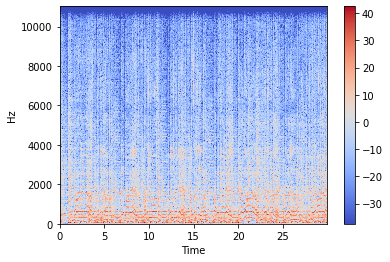

In [64]:
'''Plotting the STFT in Decibells'''

librosa.display.specshow(stft_db,sr = sampling_rate,x_axis = 'time',y_axis='hz')
plt.colorbar()

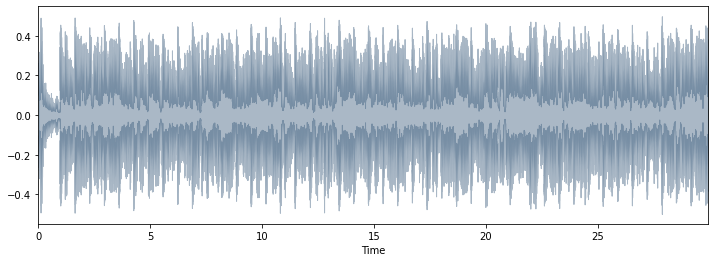

In [65]:
'''Spectral Roll Off Plot'''
from sklearn.preprocessing import normalize
spectral_rolloff = librosa.feature.spectral_rolloff(data + 0.01,sr=sampling_rate)[0]
plt.figure(figsize=(12,4))
librosa.display.waveplot(data,sr=sampling_rate,alpha = 0.4,color = "#2B4F72")

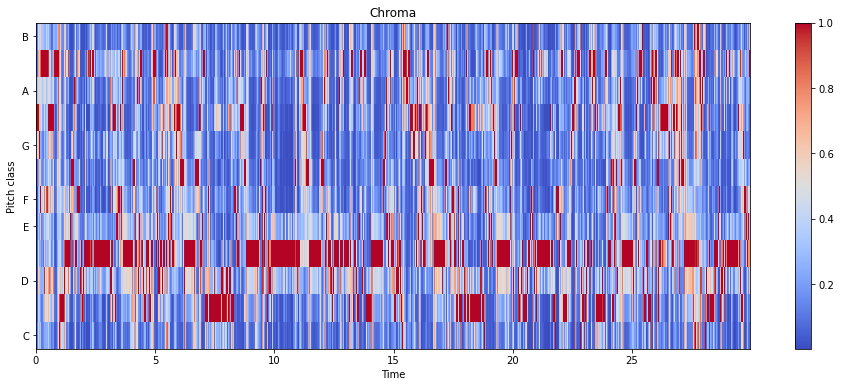

In [66]:
'''Illustration of Chroma Features using colorbar'''
import librosa.display as lplt
chroma = librosa.feature.chroma_stft(data,sr=sampling_rate)
plt.figure(figsize = (16,6))
lplt.specshow(chroma,sr=sampling_rate,x_axis='time',y_axis = 'chroma',cmap = 'coolwarm')
plt.colorbar()
plt.title("Chroma")
plt.show()

In [69]:
y = LabelEncoder().fit_transform(df.iloc[:,-1])
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [70]:
print (df.iloc[:,: -1])

     audio_data_mean  audio_data_var  zcr_mean   zcr_var      sc_mean  \
0          -0.000006        0.005767  0.048047  0.045739  1236.041685   
1           0.000002        0.007420  0.046920  0.044718  1246.844132   
2           0.000004        0.005981  0.045324  0.043269  1279.097243   
3           0.000007        0.007290  0.044092  0.042148  1270.930208   
4          -0.000014        0.008152  0.047311  0.045073  1273.617030   
..               ...             ...       ...       ...          ...   
421        -0.000030        0.025369  0.099325  0.089460  2246.150215   
422        -0.000027        0.025815  0.090875  0.082617  2135.536927   
423        -0.000021        0.031204  0.099109  0.089286  2327.898332   
424        -0.000012        0.002413  0.077567  0.071550  1475.996173   
425         0.000012        0.000109  0.152511  0.129251  2217.460667   

           sc_var  srolloff_mean  srolloff_var  mfcc_mean    mfcc_var  \
0    3.972725e+05    2527.453472  2.556835e+06  -3

In [71]:
from sklearn.preprocessing import StandardScaler
fit = StandardScaler()
X = fit.fit_transform(np.array(df.iloc[:,:-1],dtype = float))

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)

In [73]:
from keras.models import Sequential

In [74]:
def train(model,epochs,optimizer):
    batch_size = 128
    model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics = 'accuracy')
    return model.fit(X_train , y_train , validation_data = (X_test,y_test),epochs = epochs,batch_size = batch_size)

In [75]:
def plot(history):
    print ("Validation Accuracy",max(history.history["validation_accuracy"]))
    pd.DataFrame(history.history).plot(figsize = (12,6))
    plt.show()

In [89]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512,activation='relu',input_shape = (X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(10,activation='softmax'),
    
])

print (model.summary())
model_history = train(model=model,epochs = 600,optimizer = 'adam')

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 512)               6656      
_________________________________________________________________
dropout_20 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_21 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_22 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 64)               

In [90]:
test_loss,test_accuracy = model.evaluate(X_test,y_test,batch_size = 128)
print ("TestLoss:", test_loss)
print ("Accuracy:" , test_accuracy*100)

2/2 [==============================] - 0s 3ms/step - loss: 3.4171 - accuracy: 0.9007
TestLoss: 3.417116403579712
Accuracy: 90.07092118263245
